# Assignment 1 (individual)

## Network Analytics 

### Konstantinos Paganopoulos

This is based on the data file called HW1_asset_prices.csv. This represents the price movements of a
set of assets (bonds, stocks etc., their description is quite irrelevant here).
Economists and investors are very interested in the correlation of asset prices, both to understand risk,
as well as (hopefully) find correlation to lagged asset prices for investing. A correlation matrix with N
assets is an N × N matrix of correlations. See https://en.wikipedia.org/wiki/Stock_correlation_network
for some background information.

Your task is to visualize the correlation matrix in network form. You are free to use any python package
for your calculations in a (numpy, scipy, pandas etc.) as you see fit. For b and c, I expect you to use the
matplotlib.pyplot interface in NetworkX. You can gain the +5 point if you (i) submit in Jupyter
notebook format (ii) interface to any external drawing packages such as graphviz to call one of their
drawing functions.

Get a skeleton code working to do the tasks (can be done in under 10 lines of code with the right built-in
functions in pandas and networkx) and then enhance and explore from there on.

a. (10 points) Calculate the correlation matrix (you may have to use your Stats and
Econometrics knowledge here)

b. (10 points) With assets as nodes, plot the matrix as a network. Experiment with the
different graph layouts and choose the one that you believe is best, and explain why

c. (10 points) Enhance your plot by representing the thickness of the edges and size of the
nodes to give some insight.

#### Answers:

a.

We first import the necessary libraries. We also use the command "%matpotlib incline" in order to include our graphs in jupyter notebook.

In [1]:
# we first import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
from graphviz import Graph
import matplotlib.pyplot as plt

We load our data set.

In [2]:
# we load the csv file
data = pd.read_csv("HW1_asset_prices.csv", sep = ',')

In [3]:
# we see the first 5 rows of our data set
data.head()

Date  EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  \
0  2017-11-08       81.83       16.40      235.46       46.78       69.87   
1  2017-11-07       81.89       16.43      235.42       46.56       69.64   
2  2017-11-06       81.86       16.53      235.41       46.86       69.90   
3  2017-11-03       81.80       16.22      235.18       46.34       69.80   
4  2017-11-02       81.73       16.12      234.96       46.58       69.91   

   EOD~EMB.11  EOD~EPP.11  EOD~EWG.11  EOD~EWI.11  ...  EOD~VGK.11  \
0      114.60       47.69       33.18       30.95  ...       58.20   
1      114.65       47.22       33.07       31.09  ...       58.17   
2      115.26       47.20       33.34       31.22  ...       58.67   
3      115.42       47.09       33.39       31.22  ...       58.58   
4      116.15       47.31       33.50       31.43  ...       58.69   

   EOD~VPL.11  EOD~VXX.11  EOD~XLB.11  EOD~XLE.11  EOD~XLF.11  EOD~XLK.11  \
0       72.77       33.53       58.70       69.82       26.25       64.01   
1       72.20       33.52       58.64       70.16       26.38       63.66   
2       71.98       33.34       58.58       70.25       26.75       63.63   
3       71.88       33.66       58.83       68.68       26.78       63.49   
4       71.89       33.71       58.86       68.48       26.89       62.99   

   EOD~XLU.11  EOD~CSJ.11  EOD~FXF.11  
0       55.70      104.96     94.5100  
1       55.66      105.01     94.5400  
2       55.00      105.00     94.7500  
3       55.21      105.00     94.4400  
4       55.01      105.04     94.6299  

[5 rows x 40 columns]

We drop the first column:

In [4]:
# we drop the first column
df = data.drop('Date', axis = 1)
df.head()

EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  EOD~EMB.11  \
0       81.83       16.40      235.46       46.78       69.87      114.60   
1       81.89       16.43      235.42       46.56       69.64      114.65   
2       81.86       16.53      235.41       46.86       69.90      115.26   
3       81.80       16.22      235.18       46.34       69.80      115.42   
4       81.73       16.12      234.96       46.58       69.91      116.15   

   EOD~EPP.11  EOD~EWG.11  EOD~EWI.11  EOD~EWJ.11  ...  EOD~VGK.11  \
0       47.69       33.18       30.95       60.02  ...       58.20   
1       47.22       33.07       31.09       59.65  ...       58.17   
2       47.20       33.34       31.22       59.18  ...       58.67   
3       47.09       33.39       31.22       59.19  ...       58.58   
4       47.31       33.50       31.43       59.05  ...       58.69   

   EOD~VPL.11  EOD~VXX.11  EOD~XLB.11  EOD~XLE.11  EOD~XLF.11  EOD~XLK.11  \
0       72.77       33.53       58.70       69.82       26.25       64.01   
1       72.20       33.52       58.64       70.16       26.38       63.66   
2       71.98       33.34       58.58       70.25       26.75       63.63   
3       71.88       33.66       58.83       68.68       26.78       63.49   
4       71.89       33.71       58.86       68.48       26.89       62.99   

   EOD~XLU.11  EOD~CSJ.11  EOD~FXF.11  
0       55.70      104.96     94.5100  
1       55.66      105.01     94.5400  
2       55.00      105.00     94.7500  
3       55.21      105.00     94.4400  
4       55.01      105.04     94.6299  

[5 rows x 39 columns]

Now we calculate the correlation matrix as follows:

In [5]:
# we calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix_initial = corr_matrix # store correlation matrix for future questions
corr_matrix_initial

EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  \
EOD~BND.11    1.000000   -0.822062    0.794479    0.069905    0.114368   
EOD~DBC.11   -0.822062    1.000000   -0.574282    0.349666    0.200079   
EOD~DIA.11    0.794479   -0.574282    1.000000    0.468724    0.563945   
EOD~EEM.11    0.069905    0.349666    0.468724    1.000000    0.906563   
EOD~EFA.11    0.114368    0.200079    0.563945    0.906563    1.000000   
EOD~EMB.11    0.912854   -0.600426    0.917934    0.383581    0.412868   
EOD~EPP.11    0.119582    0.325952    0.519725    0.968244    0.881808   
EOD~EWG.11    0.099310    0.228763    0.568437    0.871560    0.961832   
EOD~EWI.11   -0.482615    0.600429   -0.070294    0.609441    0.722791   
EOD~EWJ.11    0.638039   -0.472528    0.897045    0.553773    0.701312   
EOD~EWQ.11    0.133298    0.180010    0.579963    0.830074    0.959346   
EOD~EWU.11   -0.517597    0.742558   -0.122190    0.731485    0.728727   
EOD~FXB.11   -0.881718    0.785573   -0.815277   -0.010376   -0.047338   
EOD~FXC.11   -0.764207    0.959362   -0.539431    0.409094    0.227213   
EOD~FXE.11   -0.751606    0.934234   -0.555548    0.300953    0.178322   
EOD~FXI.11    0.297078   -0.145443    0.540373    0.714284    0.708423   
EOD~FXY.11   -0.215348    0.587160   -0.254213    0.199016    0.014197   
EOD~GDX.11    0.235482    0.260990    0.208053    0.412808    0.224695   
EOD~GLD.11    0.082024    0.397393    0.056570    0.440848    0.253518   
EOD~IEF.11    0.960502   -0.887364    0.616693   -0.161149   -0.115984   
EOD~IYR.11    0.955606   -0.765263    0.856419    0.192315    0.242269   
EOD~JNK.11    0.445421   -0.022564    0.778771    0.820003    0.808507   
EOD~LQD.11    0.971305   -0.694091    0.866714    0.266759    0.286353   
EOD~SLV.11   -0.354167    0.724506   -0.256180    0.371996    0.187288   
EOD~SPY.11    0.842149   -0.641248    0.991233    0.415816    0.517151   
EOD~TIP.11    0.859502   -0.457060    0.753160    0.390606    0.312750   
EOD~TLT.11    0.936742   -0.849735    0.571482   -0.136222   -0.123104   
EOD~USO.11   -0.867886    0.986548   -0.664995    0.266093    0.123862   
EOD~UUP.11    0.675114   -0.898963    0.518790   -0.313187   -0.187701   
EOD~VGK.11   -0.037230    0.333239    0.412195    0.872187    0.975473   
EOD~VPL.11    0.536324   -0.215966    0.875397    0.788827    0.852729   
EOD~VXX.11   -0.900317    0.773717   -0.883305   -0.162012   -0.274274   
EOD~XLB.11    0.597031   -0.238640    0.898652    0.743330    0.759922   
EOD~XLE.11   -0.613705    0.895370   -0.346392    0.522937    0.333035   
EOD~XLF.11    0.689425   -0.509694    0.975872    0.488016    0.596364   
EOD~XLK.11    0.845532   -0.644009    0.988677    0.403966    0.504831   
EOD~XLU.11    0.941027   -0.717165    0.910599    0.239615    0.291689   
EOD~CSJ.11    0.934951   -0.713552    0.917660    0.227668    0.308123   
EOD~FXF.11   -0.769985    0.870505   -0.657030    0.224999    0.135446   

            EOD~EMB.11  EOD~EPP.11  EOD~EWG.11  EOD~EWI.11  EOD~EWJ.11  ...  \
EOD~BND.11    0.912854    0.119582    0.099310   -0.482615    0.638039  ...   
EOD~DBC.11   -0.600426    0.325952    0.228763    0.600429   -0.472528  ...   
EOD~DIA.11    0.917934    0.519725    0.568437   -0.070294    0.897045  ...   
EOD~EEM.11    0.383581    0.968244    0.871560    0.609441    0.553773  ...   
EOD~EFA.11    0.412868    0.881808    0.961832    0.722791    0.701312  ...   
EOD~EMB.11    1.000000    0.449375    0.408301   -0.245520    0.785165  ...   
EOD~EPP.11    0.449375    1.000000    0.859786    0.533985    0.559117  ...   
EOD~EWG.11    0.408301    0.859786    1.000000    0.670526    0.664514  ...   
EOD~EWI.11   -0.245520    0.533985    0.670526    1.000000    0.120915  ...   
EOD~EWJ.11    0.785165    0.559117    0.664514    0.120915    1.000000  ...   
EOD~EWQ.11    0.431202    0.813360    0.964138    0.715726    0.656312  ...   
EOD~EWU.11   -0.246228    0.672423    0.673132    0.896797    0.075002  ...   
EOD~FXB.11   -0.858135  

b. 

We now copy our correlation matrix to a txt file so as to read it later as we did in the tutorial:

In [6]:
corr_matrix_initial.to_csv('output.txt', index = True, header = True, sep = ' ')

In order to construct the edgelist file as in the tutorial we edit the correlation matrix so as to have all possible edge combinations with their correlation as follows:

In [7]:
# reshape the corr_matrix so as to have all possible edge combinations with their correlations
# include only values with absolute value of correlation greater or equal than 0.01
# convert corr_matrix to columns
corr_matrix = corr_matrix[abs(corr_matrix) >= 0.01].stack().reset_index(name = 'correlations')

# remove diagonal line of matrix
corr_matrix = corr_matrix[corr_matrix['level_0'] != corr_matrix['level_1']]

# concatenate the two columns after sorting
corr_matrix['columns'] = corr_matrix.apply(lambda lamda: '-'.join(sorted([lamda['level_0'], lamda['level_1']])), axis = 1)

# drop duplicates and concatenated columns
corr_matrix = corr_matrix.drop_duplicates(['columns']) 
corr_matrix.drop(['columns'], inplace = True, axis = 1)

# final edgelist file
edgelist = corr_matrix
edgelist

level_0     level_1  correlations
1     EOD~BND.11  EOD~DBC.11     -0.822062
2     EOD~BND.11  EOD~DIA.11      0.794479
3     EOD~BND.11  EOD~EEM.11      0.069905
4     EOD~BND.11  EOD~EFA.11      0.114368
5     EOD~BND.11  EOD~EMB.11      0.912854
...          ...         ...           ...
1396  EOD~XLK.11  EOD~CSJ.11      0.944955
1397  EOD~XLK.11  EOD~FXF.11     -0.705373
1435  EOD~XLU.11  EOD~CSJ.11      0.960408
1436  EOD~XLU.11  EOD~FXF.11     -0.725899
1475  EOD~CSJ.11  EOD~FXF.11     -0.728065

[738 rows x 3 columns]

We now copy our correlation matrix to a txt file so as to read it later as we did in the tutorial:

In [8]:
edgelist.to_csv('edjelist.txt', index = False, header = False, sep = ' ')

We are now ready to create the graph.

In [9]:
# Create an empty graph structure with no nodes and no edges.
G = nx.Graph() # we use Graph from graphviz
# Read an un-directed graph from a list of edges
G = nx.read_edgelist("edjelist.txt", nodetype = str, data = [('weight', float)])

We now plot the Graph as indicated below and we experiment with several layouts:

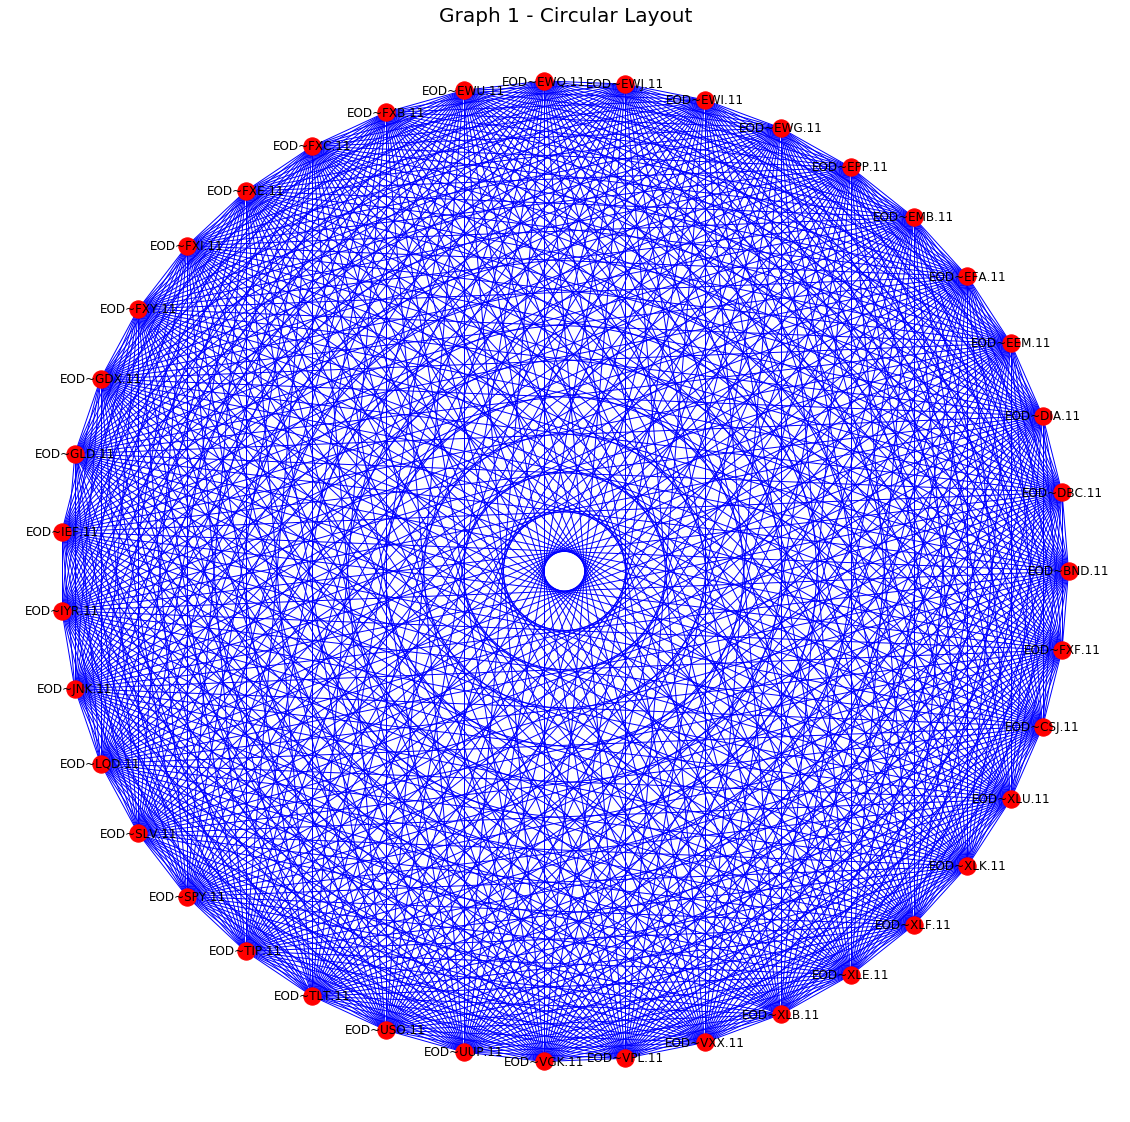

In [21]:
plt.subplots(figsize = (20,20))
plt.title("Graph 1 - Circular Layout", fontsize = 20)
nx.draw(G,pos = nx.circular_layout(G), with_labels = True, node_color = 'red', edge_color = 'blue', font_size = 12)

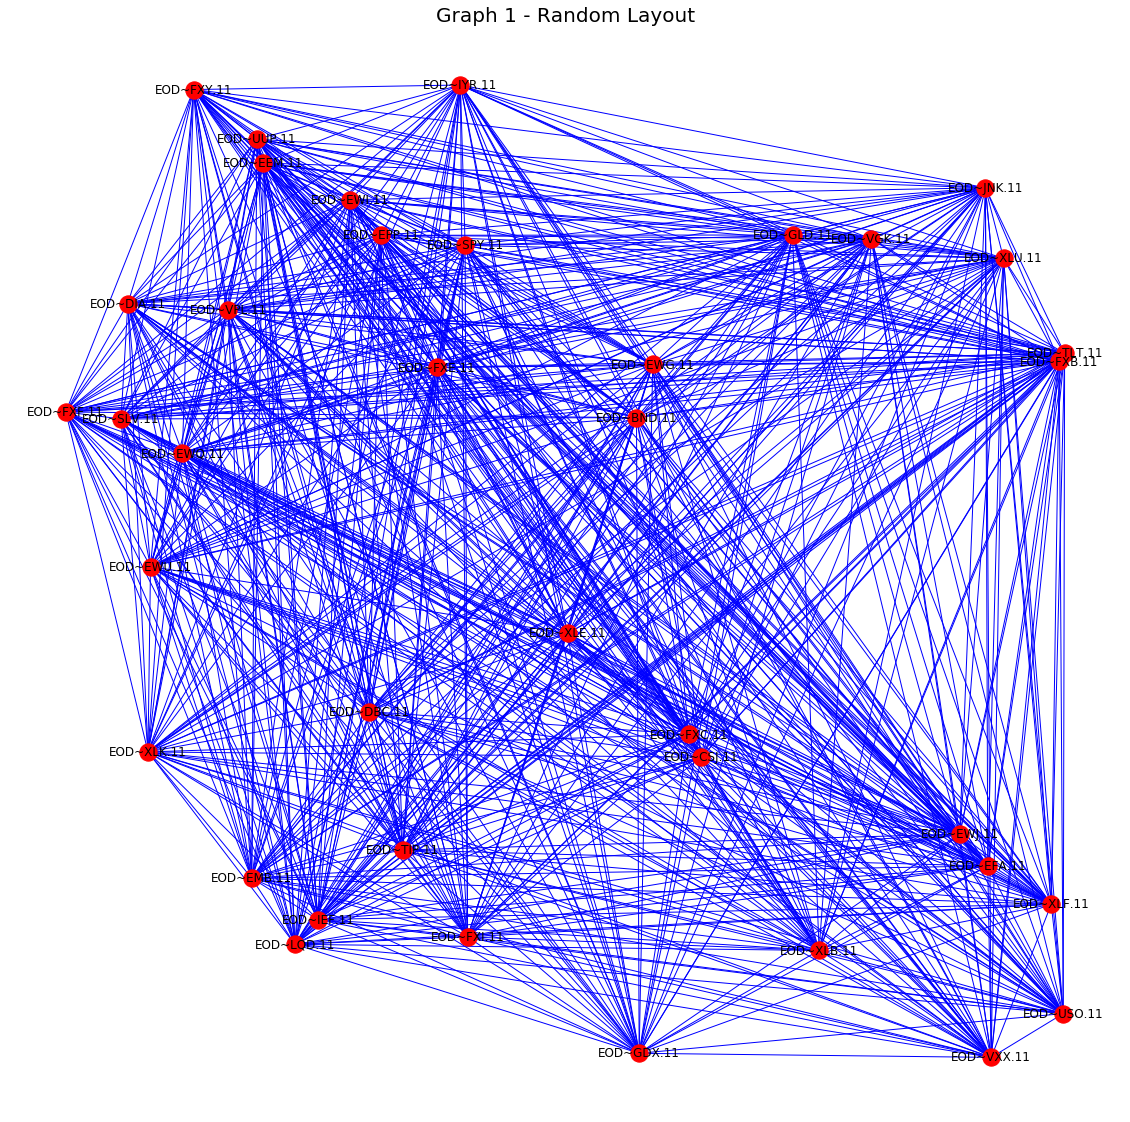

In [20]:
plt.subplots(figsize = (20,20))
plt.title("Graph 1 - Random Layout", fontsize = 20)
nx.draw(G,pos = nx.random_layout(G), with_labels = True, node_color = 'red', edge_color = 'blue', font_size = 12)

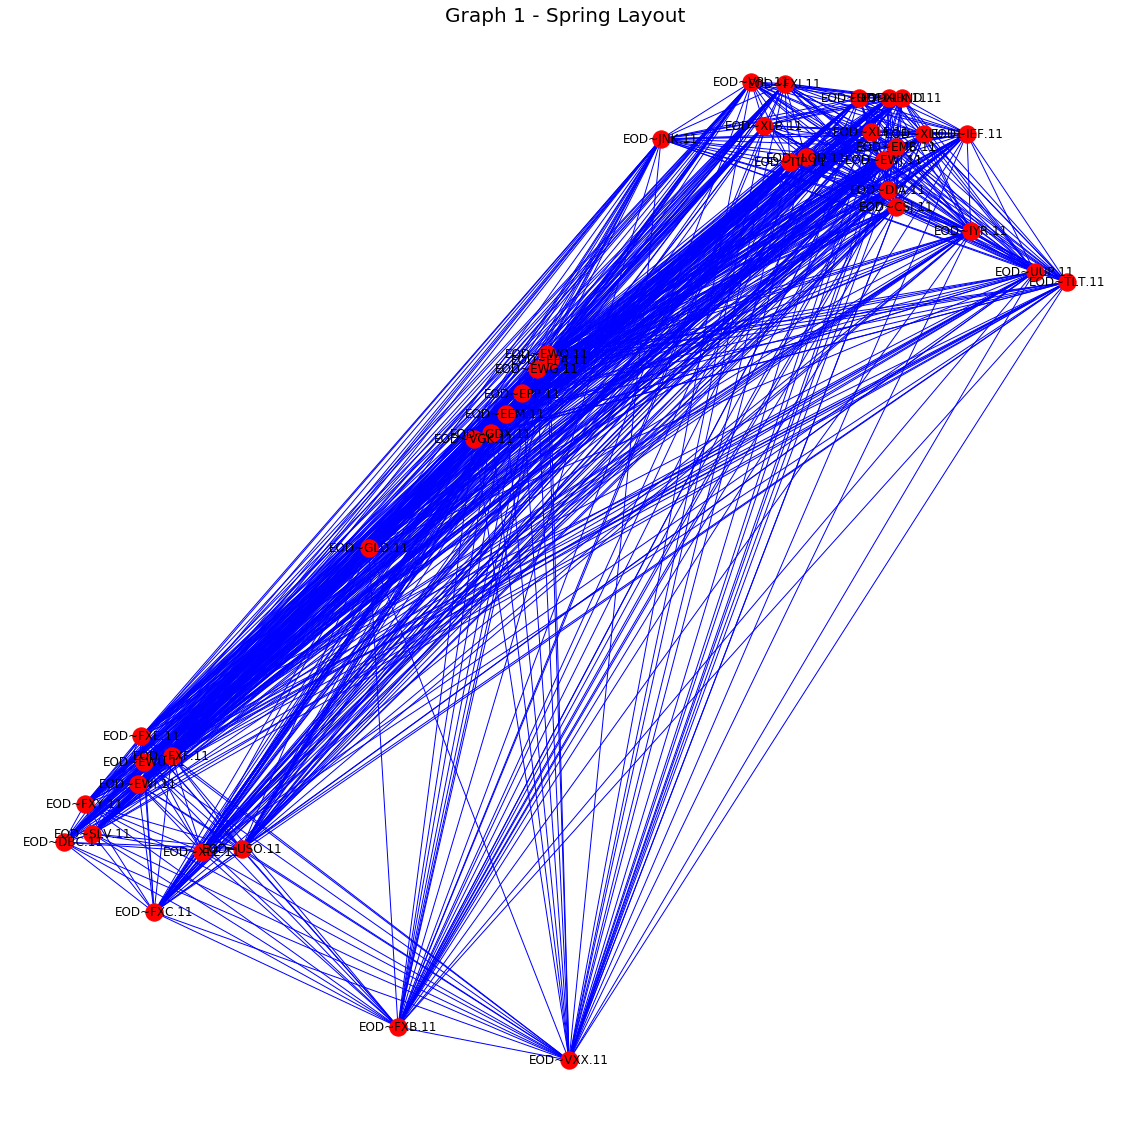

In [22]:
plt.subplots(figsize = (20,20))
plt.title("Graph 1 - Spring Layout", fontsize = 20)
nx.draw(G,pos = nx.spring_layout(G), with_labels = True, node_color = 'red', edge_color = 'blue', font_size = 12)

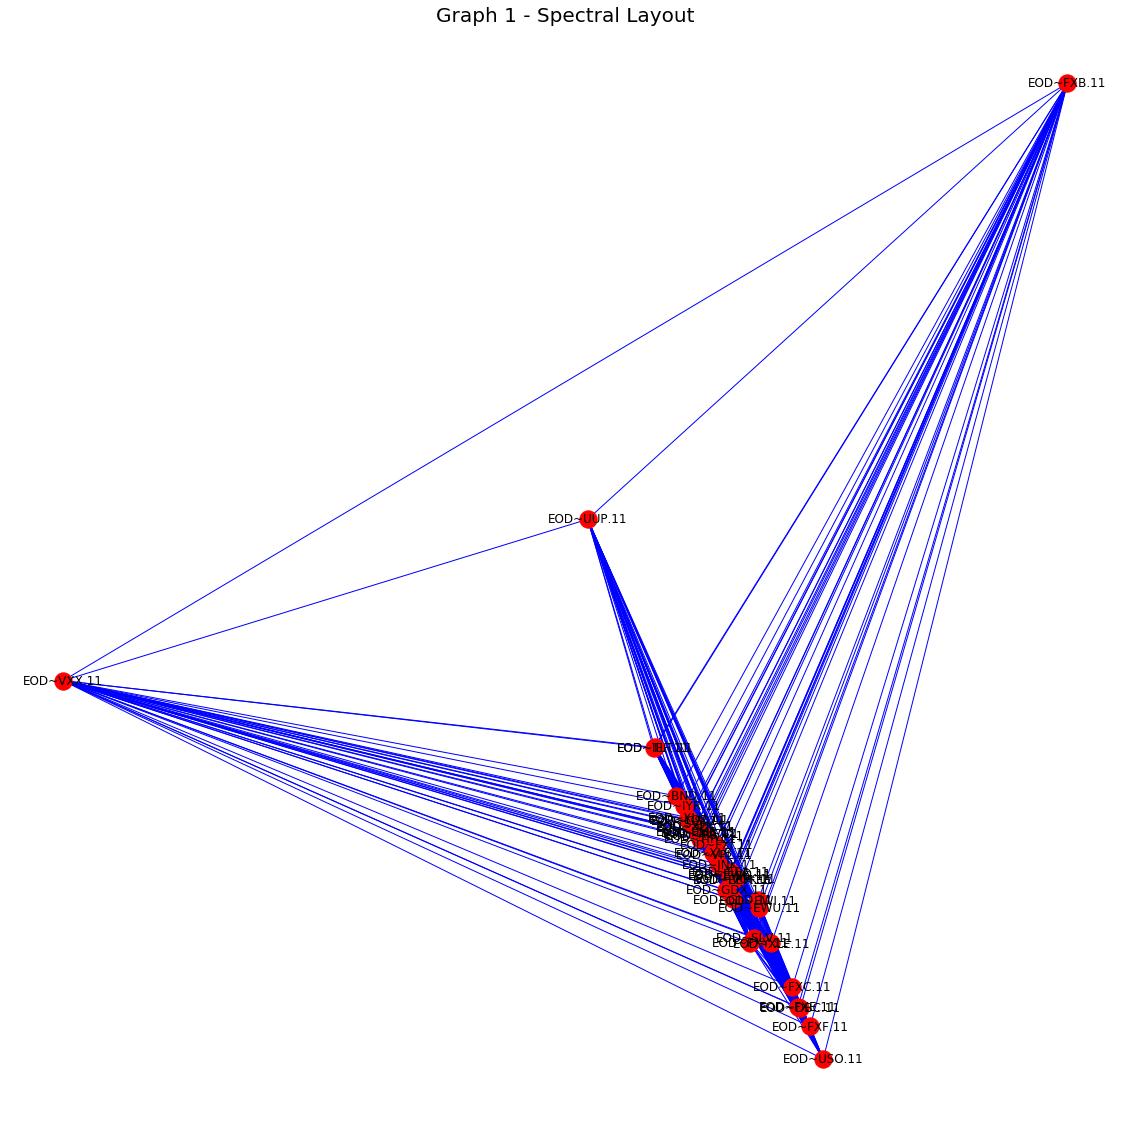

In [23]:
plt.subplots(figsize = (20,20))
plt.title("Graph 1 - Spectral Layout", fontsize = 20)
nx.draw(G,pos = nx.spectral_layout(G), with_labels = True, node_color = 'red', edge_color = 'blue', font_size = 12)

We experimented with the different graph layouts and we chose the circular one (similar to shell). We chose the circular layout as in that layout all of the nodes are connected with each other. We know that all nodes have to be connected with each other, as all of them have a significant correlation with the rest. 

With the selected layout, colours and size, we managed to visualise our network better and make it more beautiful.

We also tried random, spring and spectral layout. We rejected even the best of them, which was random, since nodes were positioned randomly and were not clearly visualized.

c.

We are now ready to enhance our plot. We first create a second graph as follows:

In [16]:
# Create an empty graph structure with no nodes and no edges.
G2 = nx.Graph() # we use Graph from graphviz
# Read an un-directed graph from a list of edges
G2 = nx.read_edgelist("edjelist.txt", nodetype = str, data = [('weight', float)])

We now store our weights in order to use them for the thickness of the edges and the size of our nodes.

In [13]:
weights = abs(corr_matrix_initial).sum(axis = 0).to_list() # absolute value of sum of correlations in a node
weights = list(np.asarray(weights) * 20) # we multiple by 20 in order to be more visible
# we use absolute value because if nodes have very high positive and very high negative correlations
# we risk being shown with zero correlations
weights2 = list(nx.get_edge_attributes(G2, 'weight').values())
weights2 = list(np.asarray((weights2)))

We now plot the Graph as indicated below:

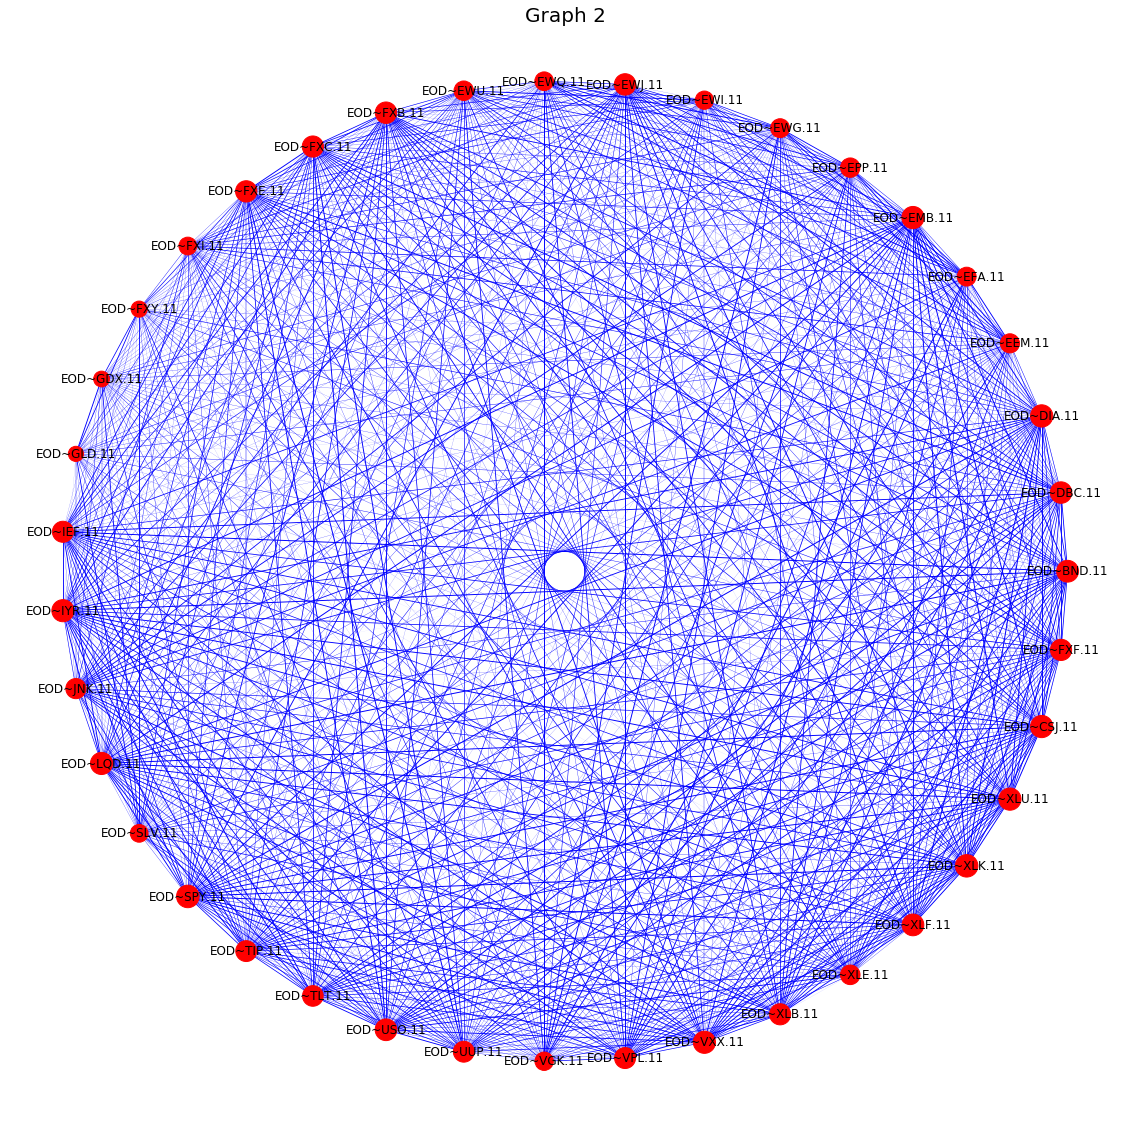

In [14]:
plt.subplots(figsize = (20,20))
plt.title("Graph 2", fontsize = 20)
nx.draw(G2, pos = nx.circular_layout(G2), node_size = weights, width = weights2, with_labels = True, node_color = 'red', edge_color = 'blue', font_size = 12)

To sum up, we visualised the different weights through edge thickness and node size.

At the following commands we make use of the graphviz external drawing package for our second graph and call one of its drawing functions.

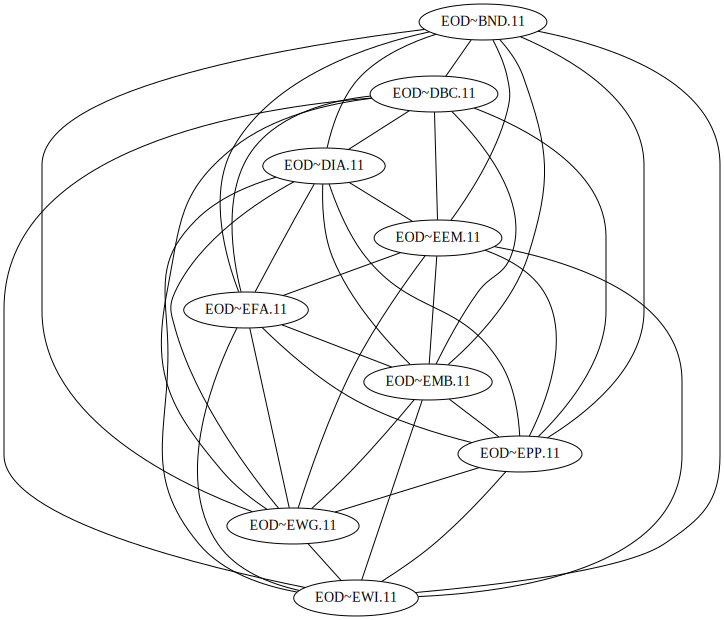

In [15]:
graphviz_example = Graph(name = 'Graphviz Example', format = 'svg', strict = True)

node_list = list(nx.nodes(G2))

# we restrict only to 9 nodes since the graph 
# would then be too large for effective visualisation
for j in range(0,9):
    for i in range(0, 9):
        if node_list[j] != node_list[i]:
            graphviz_example.edge(node_list[j], node_list[i])

graphviz_example